In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [39]:
columns = [
    'timestamp',
    'gender',
    'age',
    'country',
    'AAQ1',
    'AAQ2',
    'AAQ3',
    'AAQ4',
    'AAQ5',
    'AAQ6',
    'AAQ7',
    'AAQ8',
    'AAQ9',
    'AAQ10',
    'AAQ11',
    'AAQ12',
    'AAQ13',
    'AAQ14',
    'AAQ15',
    'AAQ16',
    'AAQ17',
    'UOM1',
    'UOM2',
    'UOM3',
    'UOM4',
    'UOM5',
    'UOM6',
    'UOM7',
    'UOM8',
    'UOM9',
    'UOM10',
    'UOM11',
    'UOM12',
    'UOM13',
    'UOM14',
    'UOM15'
]

In [40]:
responses = pd.read_csv(
        'responses.csv',
        names=columns,
        header=0
)

In [41]:
responses = responses[responses['age'] < 100]
responses.head()

,timestamp,gender,age,country,AAQ1,AAQ2,AAQ3,AAQ4,AAQ5,AAQ6,...,UOM6,UOM7,UOM8,UOM9,UOM10,UOM11,UOM12,UOM13,UOM14,UOM15
0,10/30/2016 19:31:43,Male,40,France,4,3,3,4,3,1,...,1,1,1,1,1,1,1,2,2,1
1,10/30/2016 21:16:32,Female,22,Italy,5,6,4,2,4,2,...,2,2,1,2,2,5,2,4,5,2
2,10/30/2016 21:21:31,Female,23,Italy,5,7,2,3,6,6,...,1,1,1,4,4,1,5,1,1,1
3,10/30/2016 22:29:16,Female,26,Italy,5,6,4,5,3,2,...,1,1,1,1,2,4,2,1,4,1
4,10/30/2016 23:09:41,Female,21,Italy,5,7,4,7,1,1,...,4,3,1,1,1,4,3,4,5,4


In [42]:
responses['Male'] = responses['gender'] == 'Male'
responses['Female'] = responses['gender'] == 'Female'
responses['Not Listed'] = responses['gender'] == 'Not Listed'

def convert_gender(row):
    if row['gender'] == 'Male':
        return 1
    elif row['gender'] == 'Female':
        return 2
    else:
        return 3
    
responses['gender_num'] = responses.apply(convert_gender, axis=1)

In [43]:
def calculate_avoidance(response):
    score = 0;
    score += (8 - response['AAQ1'])
    score += response['AAQ2']
    score += (8 - response['AAQ3'])
    score += response['AAQ5']
    score += response['AAQ6']
    score += response['AAQ7']
    score += response['AAQ8']
    score += response['AAQ9']
    score /= 8.
    return score;

responses['avoidance'] = responses.apply(calculate_avoidance, axis=1)

In [44]:
def calculate_anxiety(response):
    score = 0;
    score += (8 - response['AAQ4'])
    score += response['AAQ10']
    score += response['AAQ11']
    score += (8 - response['AAQ12'])
    score += response['AAQ13']
    score += (8 - response['AAQ14'])
    score += response['AAQ15']
    score += (8 - response['AAQ16'])
    score += (8 - response['AAQ17'])
    score /= 9.
    return score;

responses['anxiety'] = responses.apply(calculate_anxiety, axis=1)

In [45]:
def calculate_emotional(response):
    score = 0;
    score += response['UOM1']
    score += (6 - response['UOM2'])
    score += response['UOM3']
    score += response['UOM4']
    score += response['UOM5']
    score /= 5.
    return score;

responses['emotional'] = responses.apply(calculate_emotional, axis=1)

In [46]:
def calculate_background(response):
    score = 0;
    score += response['UOM11']
    score += (6 - response['UOM12'])
    score += response['UOM13']
    score += response['UOM14']
    score += response['UOM15']
    score /= 5.
    return score;

responses['background'] = responses.apply(calculate_background, axis=1)

In [47]:
def calculate_cognitive(response):
    score = 0;
    score += response['UOM6']
    score += response['UOM7']
    score += (6 - response['UOM8'])
    score += response['UOM9']
    score += response['UOM10']
    score /= 5.
    return score;

responses['cognitive'] = responses.apply(calculate_cognitive, axis=1)

In [48]:
responses['insecurity'] = responses['anxiety'] + responses['avoidance']

In [49]:
responses_male = responses[responses['gender'] == 'Male']
responses_female = responses[responses['gender'] == 'Female']

In [62]:
measures = responses[['age','anxiety','avoidance','insecurity', 
        'emotional','cognitive','background']]
measures_male = measures[responses['gender'] == 'Male']
measures_female = measures[responses['gender'] == 'Female']
# TODO, anyone identify as 'not listed' ?
measures.head()

,age,anxiety,avoidance,insecurity,emotional,cognitive,background
0,40,2.888889,2.750,5.638889,2.4,1.8,2.2
1,22,4.777778,3.500,8.277778,4.4,2.6,4.0
2,23,2.555556,5.250,7.805556,2.2,3.0,1.0
3,26,2.666667,3.000,5.666667,4.0,2.0,2.8
4,21,5.444444,3.375,8.819444,5.0,2.8,4.0


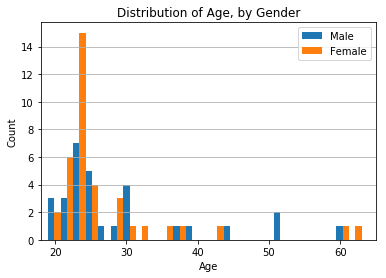

In [51]:
#plt.figure(figsize=(20,10))
plt.xlim(18, 65)
plt.hist([responses_male['age'], responses_female['age']], bins=25, label=['Male', 'Female'], rwidth=1)
plt.legend()
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Distribution of Age, by Gender')
plt.gca().yaxis.grid(which='both')
plt.show()
#plt.gcf().savefig("age_by_gender_historgram.png")

(array([ 30.,  37.,   1.]),
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 3 Patch objects>)

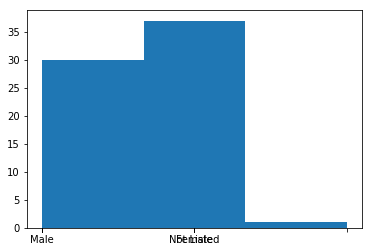

In [52]:
plt.figure()
plt.xticks(responses['gender_num'],['Male','Female','Not Listed'])
plt.hist(responses['gender_num'], bins=3)

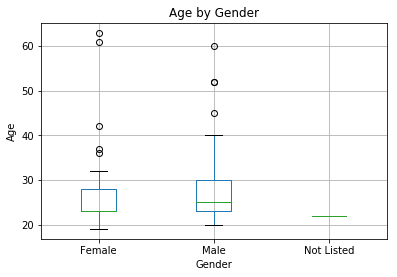

In [53]:
#plt.figure(figsize=(20,10))
#ax=plt.gca()
axlines = responses.boxplot(column='age', by='gender')
axlines.yaxis.set_label('Age')
plt.title('Age by Gender')
plt.suptitle('')
plt.ylabel('Age')
plt.xlabel('Gender')
plt.show()
#plt.savefig("age_by_gender_boxplot.png")

In [54]:
pd.DataFrame(responses['age'].describe())

,age
count,68.000000
mean,28.058824
std,9.989371
min,19.000000
25%,23.000000
50%,24.000000
75%,29.250000
max,63.000000


In [55]:
foo = pd.DataFrame(responses['gender'].value_counts())
foo

,gender
Female,37
Male,30
Not Listed,1


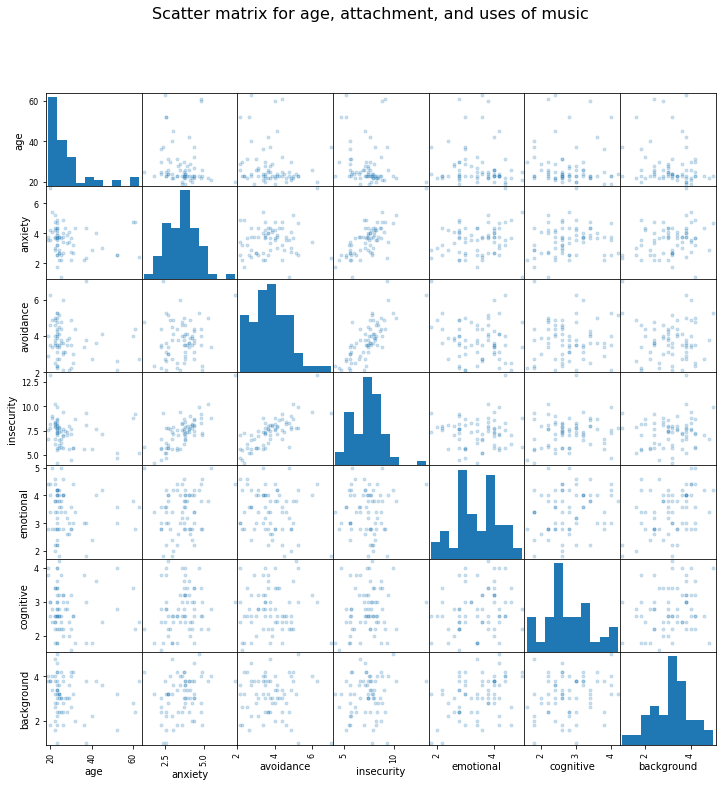

In [72]:
scatter_matrix(measures, alpha=0.2, figsize=(12,12), diagonal='hist')
plt.suptitle('Scatter matrix for age, attachment, and uses of music',fontsize=16)
plt.show()

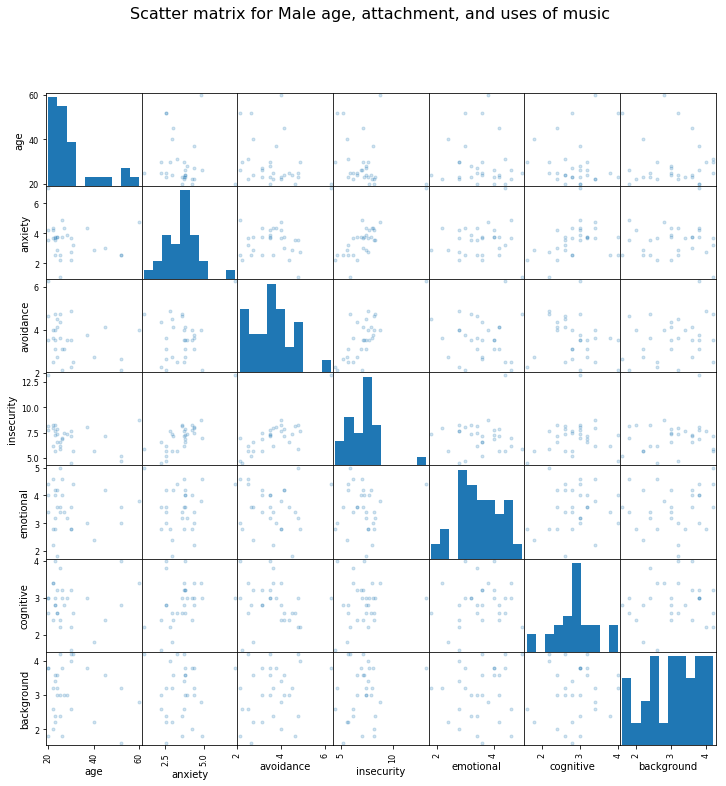

In [69]:
scatter_matrix(measures_male, alpha=0.2, figsize=(12, 12), diagonal='hist')
plt.suptitle('Scatter matrix for Male age, attachment, and uses of music',  fontsize=16)
plt.show()

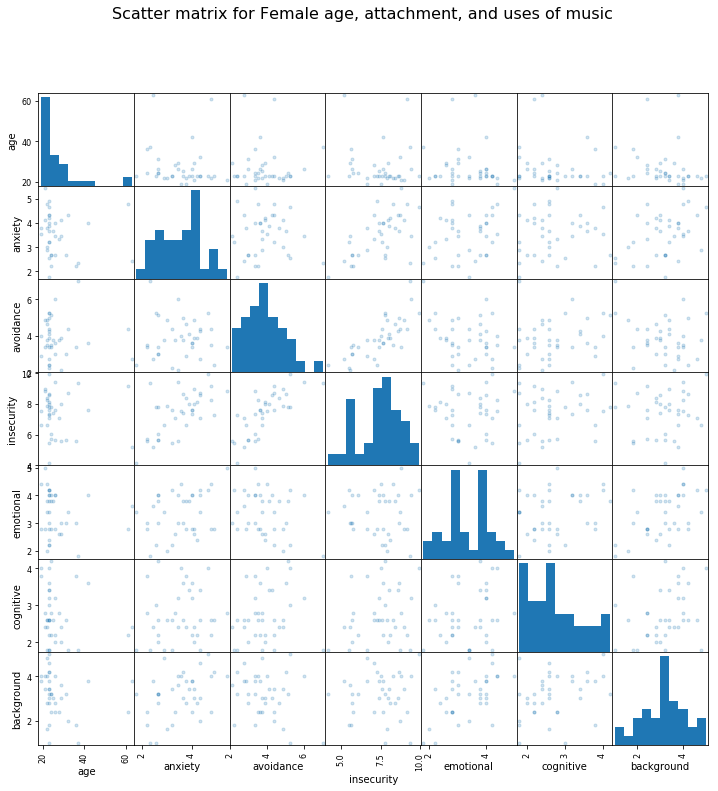

In [70]:
scatter_matrix(measures_female, alpha=0.2, figsize=(12, 12), diagonal='hist')
plt.suptitle('Scatter matrix for Female age, attachment, and uses of music',  fontsize=16)
plt.show()

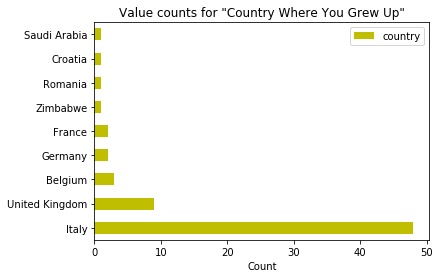

In [73]:
foo = pd.DataFrame(responses['country'].value_counts())
foo.plot.barh(color=['y'])
plt.title('Value counts for "Country Where You Grew Up"')
plt.xlabel('Count')
plt.show()

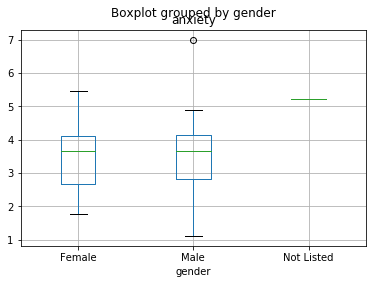

In [74]:
responses.boxplot(column='anxiety', by='gender')
plt.show()

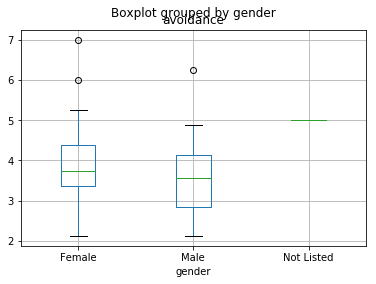

In [75]:
responses.boxplot(column='avoidance', by='gender')
plt.show()

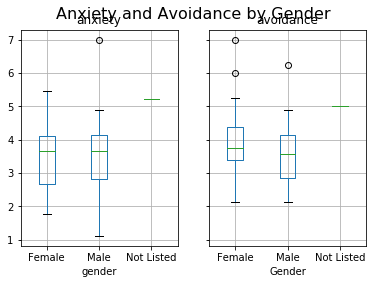

In [76]:
axes = responses.boxplot(column=['anxiety','avoidance'], by='gender')
#axes[0].yaxis.set_label('Anxiety')
#axes[1].yaxis.set_label('Avoidance')
#plt.title('Anxiety and Avoidance by Gender')
plt.suptitle('Anxiety and Avoidance by Gender',  fontsize=16)
plt.xlabel('Gender')
plt.show()


/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:5749: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


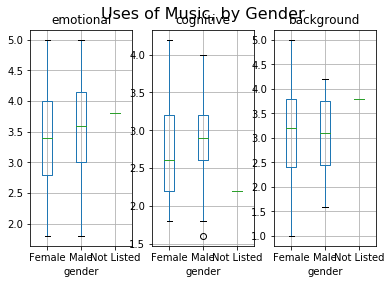

In [79]:
figure, axes = plt.subplots(1,3)
responses.boxplot(column=['emotional','cognitive','background'], by='gender', ax=axes)
plt.suptitle('Uses of Music, by Gender',  fontsize=16)
#axes[0][1].yaxis.set_label('score')
plt.show()

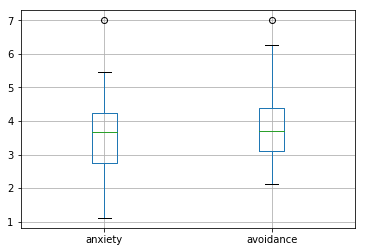

In [80]:
responses.boxplot(column=['anxiety','avoidance'])
plt.show()

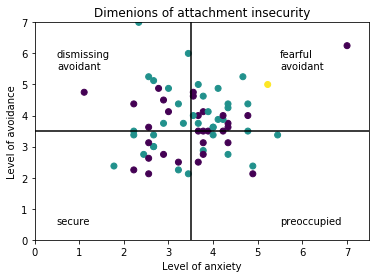

In [81]:
plt.scatter(
    x=responses['anxiety'], 
    y=responses['avoidance'],
    c=responses['gender_num']
)
plt.title('Dimenions of attachment insecurity')
plt.xlim(0, 7.5)
plt.ylim(0, 7)
plt.xlabel('Level of anxiety')
plt.ylabel('Level of avoidance')
plt.axvline(3.5, color='black')
plt.axhline(3.5, color='black')
plt.gca().text(0.5, 0.5,'secure') 
plt.gca().text(5.5, 0.5,'preoccupied') 
plt.gca().text(5.5, 5.5,'fearful\navoidant')
plt.gca().text(0.5, 5.5,'dismissing\navoidant')
plt.show()

In [82]:
sum_cognitive = responses['cognitive'].mean()
sum_cognitive

2.7882352941176465

In [83]:
sum_emotional = responses['emotional'].mean()
sum_emotional

3.438235294117648

In [84]:
sum_background = responses['background'].mean()
sum_background

3.1264705882352937

In [86]:
print (sum_cognitive / 5 * 100)
print (sum_emotional / 5 * 100)
print (sum_background / 5 * 100)

55.76470588235293
68.76470588235296
62.52941176470588


In [87]:
sum_cognitive_male = responses_male['cognitive'].mean()
sum_cognitive_female = responses_female['cognitive'].mean()
sum_background_male = responses_male['background'].mean()
sum_background_female = responses_female['background'].mean()
sum_emotional_male = responses_male['emotional'].mean()
sum_emotional_female = responses_female['emotional'].mean()
print (sum_cognitive_male / 5 * 100)
print (sum_cognitive_female / 5 * 100)
print (sum_background_male / 5 * 100)
print (sum_background_female / 5 * 100)
print (sum_emotional_male / 5 * 100)
print (sum_emotional_female / 5 * 100)

57.466666666666676
54.7027027027027
61.333333333333314
63.13513513513514
70.66666666666666
67.02702702702702


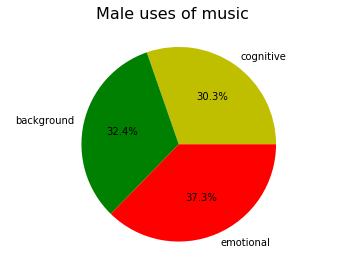

In [88]:
#ax = plt.figure(, axisbg='w')
plt.pie([sum_cognitive_male,sum_background_male,sum_emotional_male], autopct='%1.1f%%',
        labels=('cognitive','background','emotional'), colors=['y','g','r'])
plt.axis('equal')
plt.suptitle("Male uses of music",  fontsize=16)
#plt.facecolor('white')
plt.show()

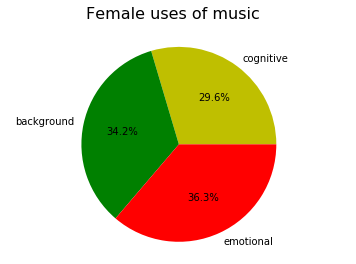

In [89]:
plt.pie([sum_cognitive_female,sum_background_female,sum_emotional_female], autopct='%1.1f%%',
        labels=('cognitive','background','emotional'),colors=['y','g','r'])
plt.axis('equal')

plt.suptitle("Female uses of music",  fontsize=16)
plt.show()

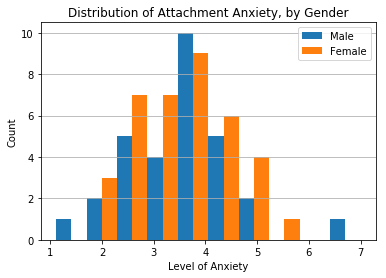

In [90]:
plt.hist([responses_male['anxiety'], responses_female['anxiety']], label=['Male', 'Female'], rwidth=1)
plt.legend()
plt.ylim(0,10.5)
plt.ylabel('Count')
plt.xlabel('Level of Anxiety')
plt.title('Distribution of Attachment Anxiety, by Gender')
plt.gca().yaxis.grid(which='both')
plt.show()

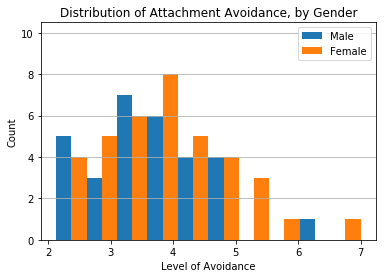

In [91]:
plt.hist([responses_male['avoidance'], responses_female['avoidance']], label=['Male', 'Female'], rwidth=1)
plt.legend()
plt.ylim(0,10.5)
plt.ylabel('Count')
plt.xlabel('Level of Avoidance')
plt.title('Distribution of Attachment Avoidance, by Gender')
plt.gca().yaxis.grid(which='both')
plt.show()